# Exploratory Data Analysis in Action - EDA: Number of attacks



In this section we explore the [_Arial Bombing Data Set_](https://www.kaggle.com/usaf/world-war-ii) and apply techniques referred to as __Exploratory Data Analysis__.

**Import statements**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Global settings**

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100
plt.rcParams["figure.figsize"] = [15,6]

**Load data set**

In [3]:
import pickle
gdf_europe = pickle.load( open( "../data/gdf_europe.p", "rb" ) )
europe = pickle.load( open( "../data/europe.p", "rb" ) )

## Research questions 

__@Number of attacks__
- Q1: How many attacks were launched between 1939 and 1945 over Europe? 
- Q2: Which Allied Force was responsible for the most of the attacks? Did this change over time? 
- Q3: Which Allied Force launched the most attacks against Germany?
- Q4: Is there a seasonal pattern in the attacks  against Germany (e.g. winter vs. summer)?
- Q5: Which area experienced the highest number of attacks? Did the area change over time?

In [4]:
df_noa = gdf_europe.copy()

> **Q1: How many attacks were launched between 1939 and 1945 over Europe?**

In [ ]:
## your code here

In [5]:
df_noa.shape[0]

120068

In [6]:
df_noa["Mission ID"].nunique()

120068

In [7]:
df_noa.groupby("year")["Mission ID"].count()

year
1939       41
1940     6109
1941     9535
1942     3879
1943    17014
1944    53837
1945    29653
Name: Mission ID, dtype: int64

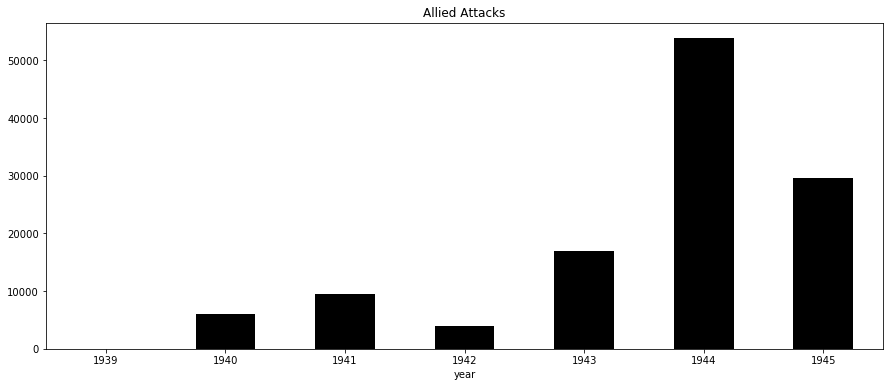

In [8]:
df_noa.groupby("year")["Mission ID"].count().plot.bar(rot=0, title="Allied Attacks", color="k");

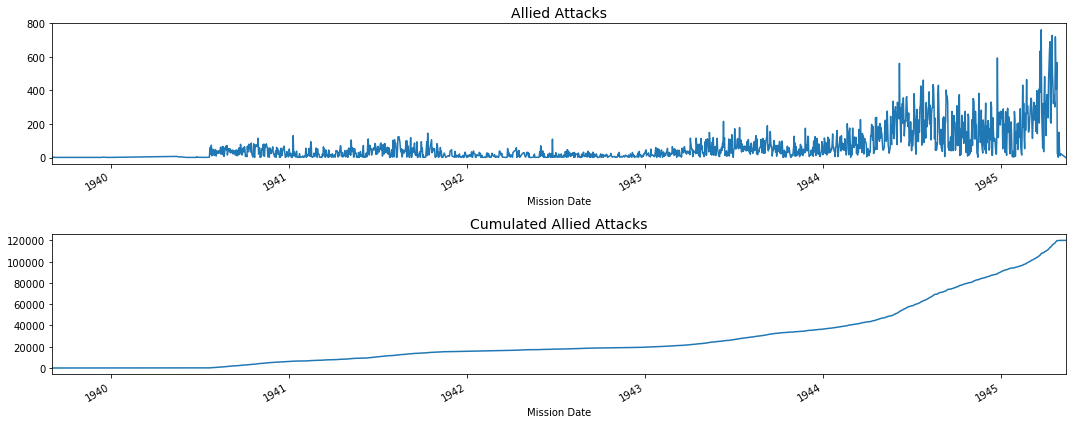

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1)
df_noa.groupby("Mission Date").count()["Mission ID"].plot(ax=ax[0])
ax[0].set_title("Allied Attacks", size=14)
df_noa.groupby("Mission Date").count()["Mission ID"].cumsum().plot(ax=ax[1])
ax[1].set_title("Cumulated Allied Attacks", size=14)
plt.tight_layout()

> **Q2: Which Allied Force was responsible for the most of the attacks? Did this change over time?**

In [ ]:
## your code here

In [10]:
df_noa.columns

Index(['Mission ID', 'Mission Date', 'Country', 'Aircraft Series',
       'Target Country', 'Target City', 'Target Type', 'Target Industry',
       'Target Latitude', 'Target Longitude', 'Attacking Aircraft',
       'High Explosives Weight (Tons)', 'Total Weight (Tons)', 'year', 'month',
       'day', 'Altitude (meters)', 'geometry'],
      dtype='object')

In [11]:
df_noa["Country"].unique()

array(['USA', 'GREAT BRITAIN', nan, 'SOUTH AFRICA', 'AUSTRALIA'],
      dtype=object)

In [12]:
df_noa["Country"].value_counts()

USA              43095
GREAT BRITAIN    27999
AUSTRALIA            4
SOUTH AFRICA         1
Name: Country, dtype: int64

In [13]:
df_noa["Country"].value_counts(dropna=False)

NaN              48969
USA              43095
GREAT BRITAIN    27999
AUSTRALIA            4
SOUTH AFRICA         1
Name: Country, dtype: int64

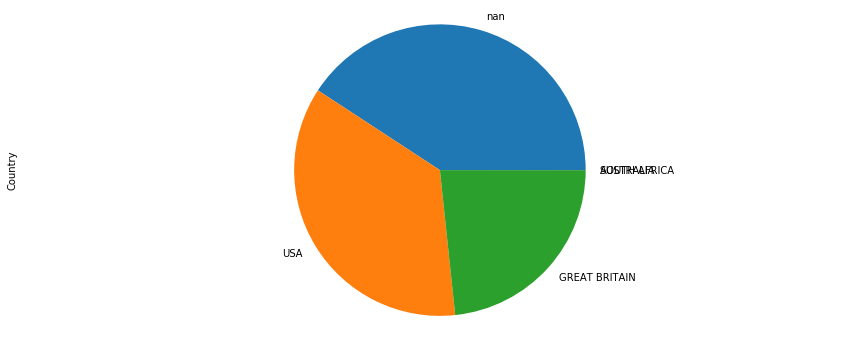

In [14]:
df_noa["Country"].value_counts(dropna=False).plot.pie()
plt.axis("equal");

In [15]:
df_noa.groupby("year")["Country"].value_counts(dropna=False)

year  Country      
1939  GREAT BRITAIN       41
1940  GREAT BRITAIN     6081
      USA                 28
1941  GREAT BRITAIN     9511
      USA                 18
      AUSTRALIA            4
      NaN                  1
      SOUTH AFRICA         1
1942  GREAT BRITAIN     3524
      NaN                230
      USA                125
1943  USA               9050
      NaN               5435
      GREAT BRITAIN     2529
1944  NaN              27761
      USA              21571
      GREAT BRITAIN     4505
1945  NaN              15542
      USA              12303
      GREAT BRITAIN     1808
Name: Country, dtype: int64

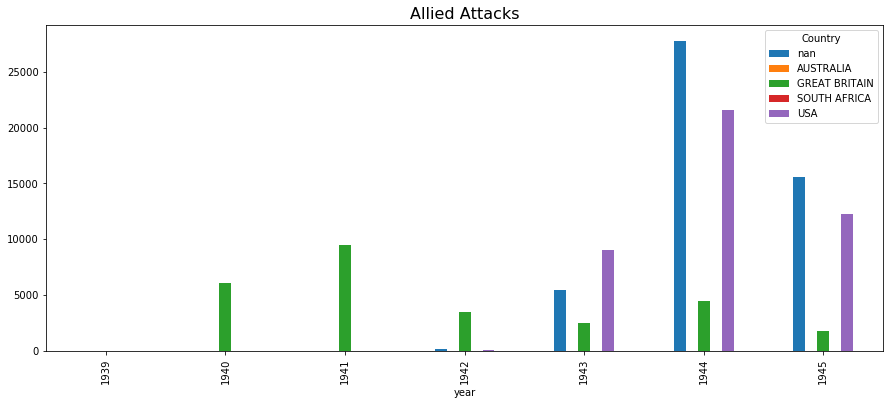

In [16]:
df_noa.groupby("year")["Country"].value_counts(dropna=False).unstack().plot.bar()
plt.title("Allied Attacks", size=16);

> **Q3: Which Allied Force launched the most attacks against Germany?**

In [ ]:
## your code here

In [17]:
df_noa.columns

Index(['Mission ID', 'Mission Date', 'Country', 'Aircraft Series',
       'Target Country', 'Target City', 'Target Type', 'Target Industry',
       'Target Latitude', 'Target Longitude', 'Attacking Aircraft',
       'High Explosives Weight (Tons)', 'Total Weight (Tons)', 'year', 'month',
       'day', 'Altitude (meters)', 'geometry'],
      dtype='object')

In [18]:
df_noa["Target Country"].unique()

array(['ITALY', 'GERMANY', 'HOLLAND OR NETHERLANDS', 'FRANCE', 'AUSTRIA',
       'BELGIUM', nan, 'GREECE', 'HUNGARY', 'YUGOSLAVIA', 'ROMANIA',
       'SWITZERLAND', 'UNKNOWN OR NOT INDICATED', 'LUXEMBOURG', 'ALGERIA',
       'NORWAY', 'POLAND', 'CRETE', 'CZECHOSLOVAKIA', 'ALBANIA',
       'BULGARIA', 'DENMARK', 'GREAT BRITAIN', 'CORSICA',
       'ETHIOPIA/ABSINNYA', 'SICILY', 'MADAGASCAR', 'IRAQ', 'LEBANON',
       'SYRIA', 'TUNISIA', 'CYPRUS', 'TURKEY', 'LIBYA', 'SARDINIA',
       'PANTELLARIA', 'MOROCCO'], dtype=object)

In [19]:
df_noa_germany = df_noa.loc[df_noa["Target Country"]=="GERMANY"]
df_noa_germany.shape

(58967, 18)

In [20]:
df_noa_germany.groupby("Country")["Mission ID"].count()

Country
GREAT BRITAIN    18929
USA              12566
Name: Mission ID, dtype: int64

> __Q4: Is there a seasonal pattern in the attacks of the Allied Forces against Germany (e.g. winter vs. summer)?__

In [ ]:
## your code here

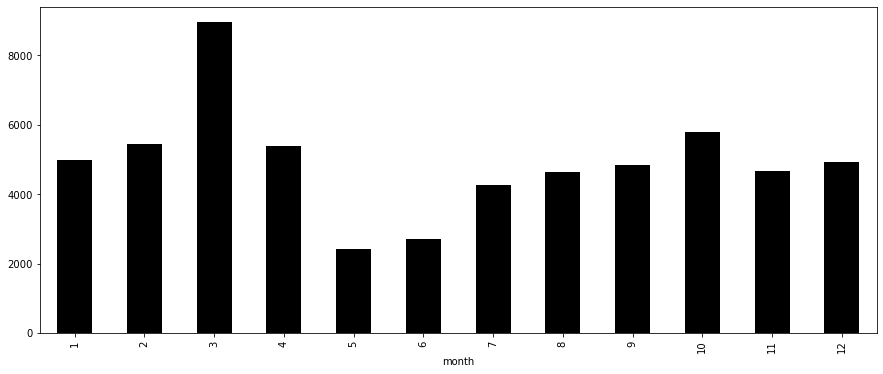

In [21]:
df_noa_germany.groupby("month")["Mission ID"].count().plot.bar(color="k");

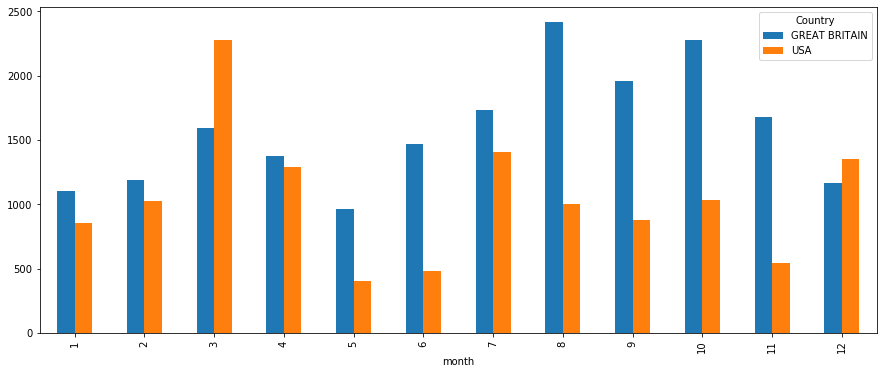

In [22]:
df_noa_germany.groupby(["month", "Country"])["Mission ID"].count().unstack().plot.bar();

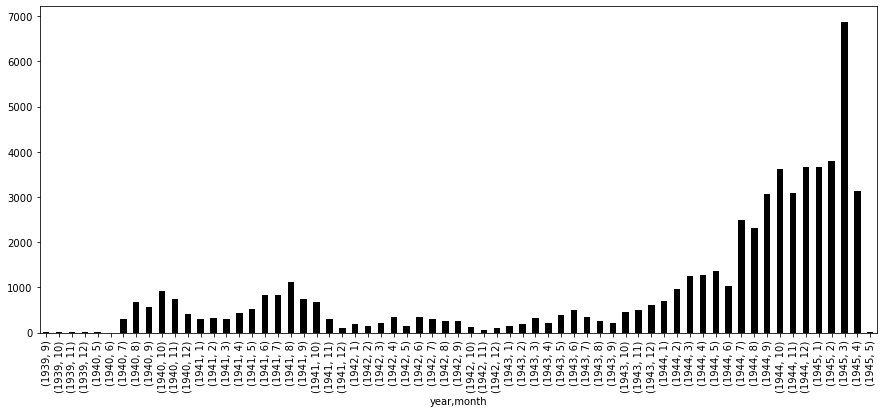

In [23]:
df_noa_germany.groupby(["year","month"])["Mission ID"].count().plot.bar(color="k");

> **Q5: Which area in Germany experienced the highest number of attacks? Did the area change over time?**

In [1]:
## your code here

In [24]:
df_noa_germany.crs

{'init': 'epsg:4326'}

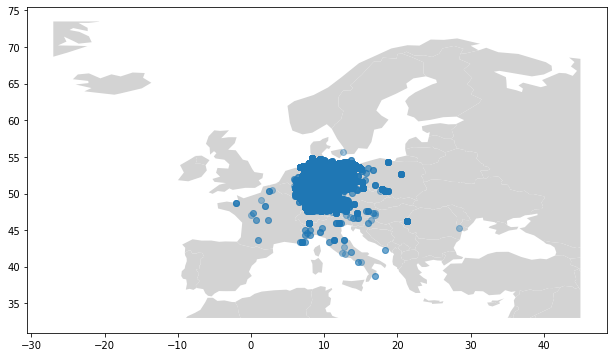

In [25]:
base = europe.plot(facecolor='lightgray')
df_noa_germany.plot(ax=base, alpha=0.4);

**Clean data set**

In [26]:
# subset germany
germany = europe.loc[europe.name=="Germany"]
# get bounding box of germany
bounds_germany = germany.geometry.bounds
bounds_germany = pd.concat([bounds_germany[["maxx", "maxy"]].max(),
                            bounds_germany[["minx", "miny"]].min()])
bounds_germany

maxx    15.016996
maxy    54.983104
minx     5.988658
miny    47.302488
dtype: float64

In [27]:
import geopandas as gpd
from shapely.geometry import Polygon
# generate polygon for bounding box
poly_germany = gpd.GeoSeries([Polygon([(bounds_germany.minx,bounds_germany.miny), 
                                       (bounds_germany.maxx,bounds_germany.miny), 
                                       (bounds_germany.maxx,bounds_germany.maxy), 
                                       (bounds_germany.minx,bounds_germany.maxy)])])
bb_germany = gpd.GeoDataFrame({'geometry': poly_germany})
# set crs
bb_germany.crs = {'init': 'epsg:4326'}

In [28]:
# subest data sets by bounding box
gdf_noa_germany = gpd.sjoin(df_noa_germany, bb_germany, 
                            how="inner", op='intersects').drop("index_right", axis=1)
germany = gpd.overlay(europe, bb_germany, how='intersection')
# set crs
germany.crs = {'init': 'epsg:4326'}

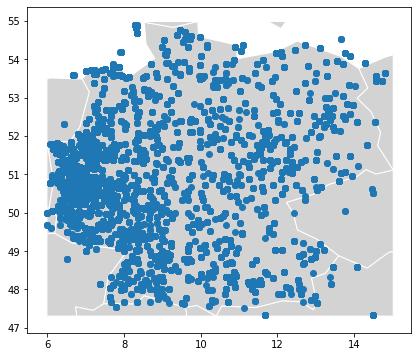

In [29]:
# check results
base = germany.plot(facecolor='lightgray', edgecolor="white")
gdf_noa_germany.plot(ax=base)

Save data to disk for further usage

In [39]:
import pickle
#pickle.dump(germany, open("../data/germany.p", "wb"))
#pickle.dump(gdf_noa_germany, open("../data/gdf_germany.p", "wb"))

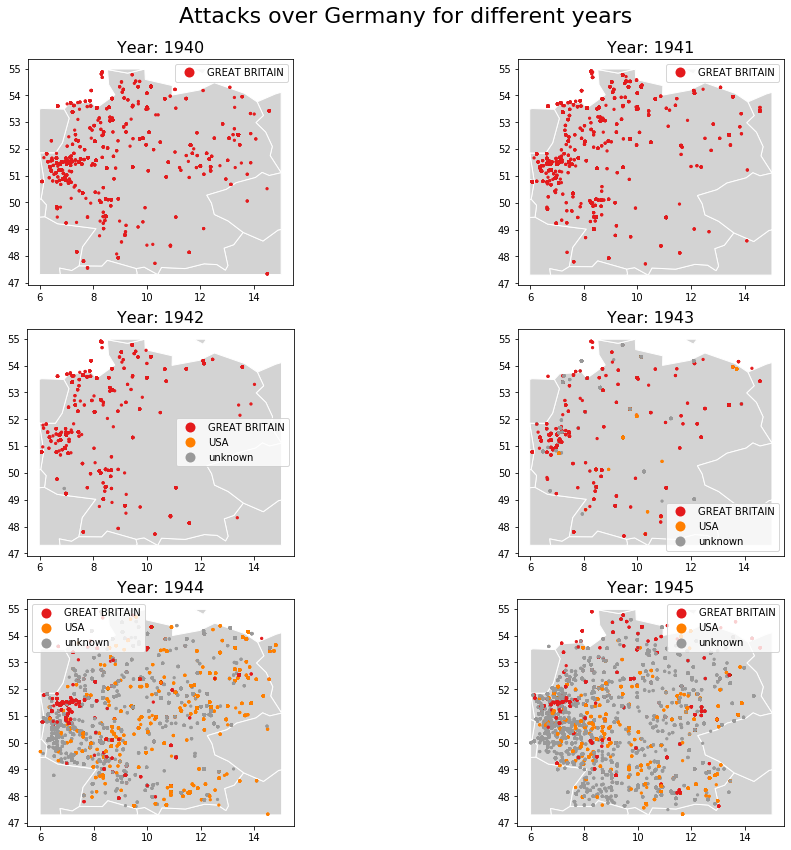

In [31]:
fig = plt.figure(figsize=(16,12))
years = [1940, 1941 ,1942, 1943, 1944, 1945]
for e in range(len(years)):
    ax = fig.add_subplot(3,2,e+1)
    ax.set_aspect('equal')
    germany.plot(ax=ax, facecolor='lightgray', edgecolor="white")
    _ = gdf_noa_germany.loc[gdf_europe.year == years[e]].copy()
    _.Country.replace(np.nan, "unknown", inplace=True)
    _.plot(ax=ax, marker='o', cmap='Set1', categorical=True,           
           column='Country', legend=True, 
           markersize=5, alpha=1)
    ax.set_title("Year: " + str(years[e]), size=16)    
plt.tight_layout()
plt.suptitle("Attacks over Germany for different years", size=22)
plt.subplots_adjust(top=0.92)

[**Kernel Density Plot**](https://en.wikipedia.org/wiki/Kernel_density_estimation)

In [32]:
import seaborn as sns

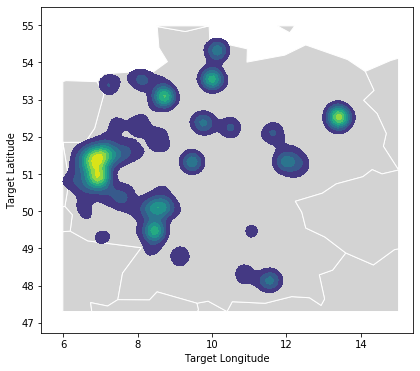

In [33]:
base = germany.plot(facecolor='lightgray', edgecolor="white")
kdp_germany = sns.kdeplot(gdf_noa_germany['Target Longitude'], # x-axis
                          gdf_noa_germany['Target Latitude'],  # y-axis
                          cmap="viridis",                      # colormap
                          shade=True,                          # Shade in the area under the KDE curve
                          shade_lowest=False,                  # shade the lowest contour
                          bw=0.2                               # method to determine kernel size
                          )                                    # 'scott', 'silverman', scalar, pair of scalars

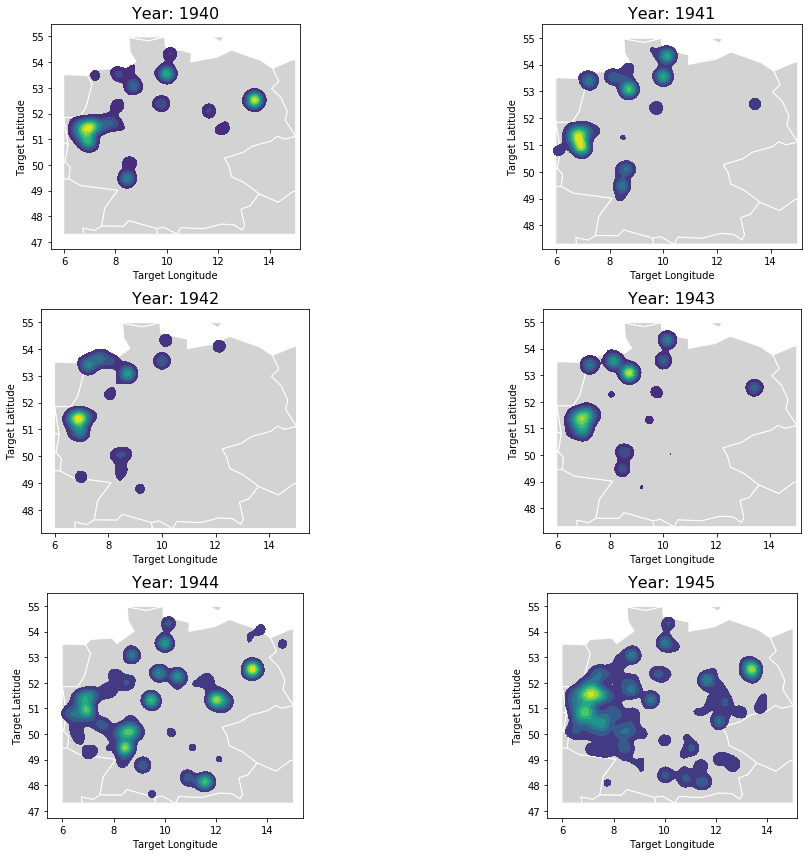

In [34]:
fig = plt.figure(figsize=(16,12))
years = [1940, 1941 ,1942, 1943, 1944, 1945]
for e, y in enumerate(years):
    _gdf = gdf_noa_germany.loc[gdf_noa_germany["year"]==y]
    ax = plt.subplot(3,2,e+1)
    ax.set_aspect('equal')
    germany.plot(ax=ax, facecolor='lightgray', edgecolor="white")
    sns.kdeplot(_gdf['Target Longitude'], _gdf['Target Latitude'], 
                cmap="viridis", shade=True, shade_lowest=False, bw=0.2, ax=ax)   
    ax.set_title("Year: " + str(y), size=16)
plt.tight_layout()

**Nicer plotting with user-defined function**

In [35]:
import os
import sys
    
# add the 'src' directory as one where we can import modules
src_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'src'))
sys.path.append(src_dir)
print(src_dir)

/Users/jokr/Documents/workshops/Programing_with_Python_FU-Berlin_2019-20/python-FU-WiSe1920/05-2019-12-06/src


/Users/jokr/Documents/workshops/Programing_with_Python_FU-Berlin_2019-20/python-FU-WiSe1920/05-2019-12-06/src/helper_funcs.py:68: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


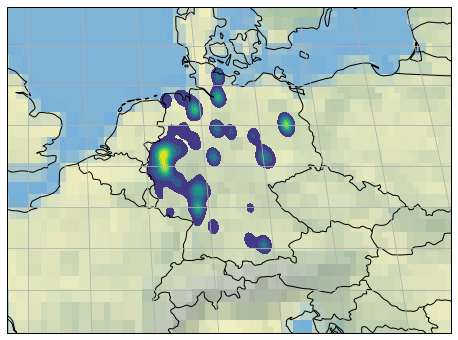

In [36]:
import helper_funcs as hf
hf.cuteplot(gpd_df=gdf_noa_germany, crs="Mollweide", 
            kdp=True, map_extend=(-1,20,45,57))

**Interactive [Heatmap](https://en.wikipedia.org/wiki/Heat_map) using folium**

In [38]:
import folium
from folium import plugins

m = folium.Map([51.163375, 10.447683], zoom_start=6, 
               max_zoom=10)
   
# convert to (n, 2) list of list format for heatmap
# https://github.com/python-visualization/folium/issues/782
location = gdf_noa_germany[[ 'Target Latitude', 'Target Longitude']].as_matrix().tolist()

# plot heatmap
m.add_child(plugins.HeatMap(location , radius=20))
m

/Users/jokr/miniconda3/envs/fupy/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


***